In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

path = os.getcwd()
file_path = os.path.join(path,"file")
sub_path = os.path.join(path,"제출")
train_df = pd.read_csv(os.path.join(file_path,"train.csv"))
test_df = pd.read_csv(os.path.join(file_path,"test.csv"))

In [2]:
from pytimekr import pytimekr
import datetime

List_holiday = []
for i in range(5,1523,7):
    List_holiday.append((datetime.datetime(2019, 1, 1)+datetime.timedelta(i)).strftime("%Y-%m-%d"))
    
for i in range(2019,2024):
    List_holiday.extend(pytimekr.holidays(year=i)) #리스트 형태로 반환

for i in range(len(List_holiday)):
    List_holiday[i] = str(List_holiday[i])
np.sort(List_holiday)

array(['2019-01-01', '2019-01-06', '2019-01-13', '2019-01-20',
       '2019-01-27', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-10', '2019-02-17', '2019-02-24',
       '2019-03-01', '2019-03-03', '2019-03-10', '2019-03-17',
       '2019-03-24', '2019-03-31', '2019-04-07', '2019-04-14',
       '2019-04-21', '2019-04-28', '2019-05-05', '2019-05-05',
       '2019-05-12', '2019-05-12', '2019-05-19', '2019-05-26',
       '2019-06-02', '2019-06-06', '2019-06-09', '2019-06-16',
       '2019-06-23', '2019-06-30', '2019-07-07', '2019-07-14',
       '2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
       '2019-08-15', '2019-08-18', '2019-08-25', '2019-09-01',
       '2019-09-08', '2019-09-12', '2019-09-13', '2019-09-14',
       '2019-09-15', '2019-09-22', '2019-09-29', '2019-10-03',
       '2019-10-06', '2019-10-09', '2019-10-13', '2019-10-20',
       '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
       '2019-11-24', '2019-12-01', '2019-12-08', '2019-

In [3]:
Holiday_y_n = []
for i in range(0,1523):
    if (datetime.datetime(2019, 1, 1)+datetime.timedelta(i)).strftime("%Y-%m-%d") in List_holiday:
        Holiday_y_n.append(0)
    else:
        Holiday_y_n.append(1)

In [4]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train_df['year'] = train_df['timestamp'].apply(lambda x : int(x[0:4]))
train_df['month'] = train_df['timestamp'].apply(lambda x : int(x[5:7]))
train_df['day'] = train_df['timestamp'].apply(lambda x : int(x[8:10]))

In [5]:
a = test_df['ID'].str.split("_")
I = ""
J = ""
K = ""
List_Test = []
for i,j,k,l in a:
    if I!=i or J!=j or K!=k:
        List_Test.append([i,j,k])
        I = i
        J = j
        K = k
    else:
        continue

In [6]:
List_i_c_l = []
for i in train_df['item'].unique():
    for j in train_df['corporation'].unique():
        for k in train_df['location'].unique():
            if train_df.loc[(train_df['item']==i) & (train_df['corporation']==j) & (train_df['location']==k) ,:].shape[0]!=0:
                List_i_c_l.append([i,j,k])

In [7]:
List_i_c_l

[['TG', 'A', 'J'],
 ['TG', 'A', 'S'],
 ['TG', 'B', 'J'],
 ['TG', 'B', 'S'],
 ['TG', 'C', 'J'],
 ['TG', 'C', 'S'],
 ['TG', 'D', 'J'],
 ['TG', 'D', 'S'],
 ['TG', 'E', 'J'],
 ['TG', 'E', 'S'],
 ['CR', 'A', 'J'],
 ['CR', 'B', 'J'],
 ['CR', 'C', 'J'],
 ['CR', 'D', 'J'],
 ['CR', 'D', 'S'],
 ['CR', 'E', 'J'],
 ['CR', 'E', 'S'],
 ['CB', 'A', 'J'],
 ['CB', 'A', 'S'],
 ['CB', 'D', 'J'],
 ['CB', 'E', 'J'],
 ['CB', 'F', 'J'],
 ['RD', 'A', 'J'],
 ['RD', 'A', 'S'],
 ['RD', 'C', 'S'],
 ['RD', 'D', 'J'],
 ['RD', 'D', 'S'],
 ['RD', 'E', 'J'],
 ['RD', 'E', 'S'],
 ['RD', 'F', 'J'],
 ['BC', 'A', 'J'],
 ['BC', 'A', 'S'],
 ['BC', 'B', 'J'],
 ['BC', 'B', 'S'],
 ['BC', 'C', 'J'],
 ['BC', 'C', 'S'],
 ['BC', 'D', 'J'],
 ['BC', 'E', 'J'],
 ['BC', 'E', 'S']]

In [8]:
for i, j, k in List_i_c_l:
    globals()[f"train_{i}_{j}_{k}"]=train_df.loc[(train_df['item']==i) & (train_df['corporation']==j) & (train_df['location']==k) ,:]
    globals()[f"train_{i}_{j}_{k}"].drop(columns=['ID', 'timestamp', 'corporation','location'])
    globals()[f"train_{i}_{j}_{k}"]['Holiday'] = Holiday_y_n
    globals()[f"train_{i}_{j}_{k}"] = globals()[f"train_{i}_{j}_{k}"][['supply(kg)', 'year', 'month', 'day','Holiday', 'price(원/kg)']]
    globals()[f"train_ar_{i}_{j}_{k}"] = np.array(globals()[f"train_{i}_{j}_{k}"])
#     print(i,j,k,globals()[f"train_{i}_{j}_{k}"].shape)
#     display(globals()[f"train_{i}_{j}_{k}"].corr())

C:\Users\USER\AppData\Local\Temp\ipykernel_18924\2872114995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"train_{i}_{j}_{k}"]['Holiday'] = Holiday_y_n
C:\Users\USER\AppData\Local\Temp\ipykernel_18924\2872114995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"train_{i}_{j}_{k}"]['Holiday'] = Holiday_y_n
C:\Users\USER\AppData\Local\Temp\ipykernel_18924\2872114995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [9]:
def minmaxscaler(data):
    
    s_data = (data-np.min(data,axis=0))/(np.max(data,axis=0)-np.min(data,axis=0))
    return s_data, np.min(data,axis=0), np.max(data,axis=0)

In [10]:
num = {"TG":10,"CR":7,"CB":5,"RD":8,"BC":9}
shape = globals()[f"train_ar_{i}_{j}_{k}"].shape
for i in train_df['item'].unique():
    globals()[f"train_x_concat_{i}"] = np.zeros((shape[0],num[i],shape[1]))
name = List_i_c_l[0][0]
n = 0
for i, j, k in List_i_c_l:
    if name != i :
        name=i
        n=0
    globals()[f"train_x_concat_{i}"][:,n,:] = globals()[f"train_ar_{i}_{j}_{k}"]
    n+=1
    globals()[f"train_minmax_{i}"],globals()[f"train_min_{i}"],globals()[f"train_max_{i}"] = minmaxscaler(globals()[f"train_x_concat_{i}"])

C:\Users\USER\AppData\Local\Temp\ipykernel_18924\3917718520.py:3: RuntimeWarning: invalid value encountered in divide
  s_data = (data-np.min(data,axis=0))/(np.max(data,axis=0)-np.min(data,axis=0))


In [11]:
def build_dataset(Training_data, seq_length, future_length):
    dataX = []
    dataY = []
    for i in range(0, Training_data.shape[0]-seq_length-future_length+1): 
        _x = Training_data[i:i+seq_length,:,:]
        _y = Training_data[i+seq_length:i+seq_length+future_length,:,-1] 
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [12]:
print(globals()[f"train_minmax_{i}"].shape)

(1523, 9, 6)


In [13]:
S_Length = 60
pred_Length = 28

for i in train_df['item'].unique():
    globals()[f"Train_x_{i}"], globals()[f"train_y_{i}"] = build_dataset(globals()[f"train_minmax_{i}"], S_Length, pred_Length)
    globals()[f"train_x_{i}"] = np.reshape(globals()[f"Train_x_{i}"],(globals()[f"Train_x_{i}"].shape[0],globals()[f"Train_x_{i}"].shape[1],-1))
    print(globals()[f"train_x_{i}"].shape, globals()[f"train_y_{i}"].shape)

(1436, 60, 60) (1436, 28, 10)
(1436, 60, 42) (1436, 28, 7)
(1436, 60, 30) (1436, 28, 5)
(1436, 60, 48) (1436, 28, 8)
(1436, 60, 54) (1436, 28, 9)


In [14]:
def rmse(y_true,y_pred):
    return tf.math.sqrt(tf.math.reduce_mean(tf.math.pow((y_true-y_pred),2)))

In [15]:
for i in train_df['item'].unique():
    globals()[f"Model{i}"]=tf.keras.Sequential()
    globals()[f"Model{i}"].add(tf.keras.layers.LSTM(units=10, return_sequences = True, input_shape=(S_Length,globals()[f"train_x_{i}"].shape[2]),activation=tf.nn.tanh))
    globals()[f"Model{i}"].add(tf.keras.layers.LSTM(units=15,return_sequences = True, activation =tf.nn.tanh))
    globals()[f"Model{i}"].add(tf.keras.layers.Lambda(lambda x: x[:, -100:, :]))
    globals()[f"Model{i}"].add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(15)))
    globals()[f"Model{i}"].add(tf.keras.layers.LSTM(units=15,return_sequences = True, activation =tf.nn.tanh))
    globals()[f"Model{i}"].add(tf.keras.layers.Lambda(lambda x: x[:, -28:, :]))
    globals()[f"Model{i}"].add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(15)))
    globals()[f"Model{i}"].add(tf.keras.layers.LSTM(units=globals()[f"train_y_{i}"].shape[2],return_sequences = True, activation =tf.nn.relu))
    globals()[f"Model{i}"].compile(loss=rmse, optimizer=tf.keras.optimizers.Adam(lr=0.0001))
    globals()[f"Model{i}"].summary()
    globals()[f"Model{i}"].fit(globals()[f"train_x_{i}"], globals()[f"train_y_{i}"], epochs=1000, batch_size=50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 10)            2840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 15)            1560      
_________________________________________________________________
lambda (Lambda)              (None, 60, 15)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 15)            240       
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 15)            1860      
_________________________________________________________________
lambda_1 (Lambda)            (None, 28, 15)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 28, 15)            2

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


29/29 [==============================] - 5s 44ms/step - loss: 0.2795
Epoch 2/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2685
Epoch 3/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2641
Epoch 4/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.2536
Epoch 5/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.2432
Epoch 6/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2376
Epoch 7/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.2354
Epoch 8/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2338
Epoch 9/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.2329
Epoch 10/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.2321
Epoch 11/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.2311
Epoch 12/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.2310
Epoch 13/1000
29/29 [=====

Epoch 100/1000
29/29 [==============================] - 1s 43ms/step - loss: 0.2189
Epoch 101/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2187
Epoch 102/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2186
Epoch 103/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2187
Epoch 104/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2184
Epoch 105/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.2184
Epoch 106/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.2182
Epoch 107/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.2183
Epoch 108/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.2184
Epoch 109/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.2181
Epoch 110/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.2180
Epoch 111/1000
29/29 [==============================] - 1s 46ms/step - loss:

29/29 [==============================] - 1s 42ms/step - loss: 0.1881
Epoch 295/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1882
Epoch 296/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1880
Epoch 297/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1881
Epoch 298/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1880
Epoch 299/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1882
Epoch 300/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1878
Epoch 301/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1878
Epoch 302/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1878
Epoch 303/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1877
Epoch 304/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1879
Epoch 305/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1878
Epoch 3

29/29 [==============================] - 1s 48ms/step - loss: 0.1846
Epoch 489/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1846
Epoch 490/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1847
Epoch 491/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1846
Epoch 492/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1846
Epoch 493/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1847
Epoch 494/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1847
Epoch 495/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1846
Epoch 496/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1846
Epoch 497/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1846
Epoch 498/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1847
Epoch 499/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1846
Epoch 5

29/29 [==============================] - 1s 47ms/step - loss: 0.1830
Epoch 683/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1830
Epoch 684/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1829
Epoch 685/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1828
Epoch 686/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1829
Epoch 687/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1830
Epoch 688/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1830
Epoch 689/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1830
Epoch 690/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1829
Epoch 691/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1828
Epoch 692/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1830
Epoch 693/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1829
Epoch 6

29/29 [==============================] - 1s 49ms/step - loss: 0.1818
Epoch 877/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1817
Epoch 878/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1817
Epoch 879/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1818
Epoch 880/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1817
Epoch 881/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1817
Epoch 882/1000
29/29 [==============================] - 1s 44ms/step - loss: 0.1817
Epoch 883/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1818
Epoch 884/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1817
Epoch 885/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1817
Epoch 886/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1817
Epoch 887/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1817
Epoch 8

29/29 [==============================] - 1s 50ms/step - loss: 0.1557
Epoch 53/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1555
Epoch 54/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1553
Epoch 55/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1555
Epoch 56/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1554
Epoch 57/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1553
Epoch 58/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1551
Epoch 59/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1552
Epoch 60/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1553
Epoch 61/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1548
Epoch 62/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1547
Epoch 63/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1548
Epoch 64/1000
29/2

29/29 [==============================] - 1s 50ms/step - loss: 0.1206
Epoch 248/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.1203
Epoch 249/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.1203
Epoch 250/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1204
Epoch 251/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1203
Epoch 252/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1203
Epoch 253/1000
29/29 [==============================] - 2s 52ms/step - loss: 0.1201
Epoch 254/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.1201
Epoch 255/1000
29/29 [==============================] - 2s 53ms/step - loss: 0.1203
Epoch 256/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.1203
Epoch 257/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1201
Epoch 258/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1200
Epoch 2

29/29 [==============================] - 1s 46ms/step - loss: 0.0915
Epoch 442/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0914
Epoch 443/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0914
Epoch 444/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0913
Epoch 445/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0911
Epoch 446/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0908
Epoch 447/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0908
Epoch 448/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0907
Epoch 449/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0907
Epoch 450/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0908
Epoch 451/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0902
Epoch 452/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0902
Epoch 4

29/29 [==============================] - 1s 46ms/step - loss: 0.0797
Epoch 636/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0794
Epoch 637/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0793
Epoch 638/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0793
Epoch 639/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0793
Epoch 640/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0796
Epoch 641/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0793
Epoch 642/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0793
Epoch 643/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0791
Epoch 644/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0791
Epoch 645/1000
29/29 [==============================] - 1s 44ms/step - loss: 0.0792
Epoch 646/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0794
Epoch 6

29/29 [==============================] - 1s 46ms/step - loss: 0.0737
Epoch 830/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0736
Epoch 831/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0736
Epoch 832/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0736
Epoch 833/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0736
Epoch 834/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0735
Epoch 835/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0736
Epoch 836/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0736
Epoch 837/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0736
Epoch 838/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0735
Epoch 839/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0734
Epoch 840/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0734
Epoch 8

29/29 [==============================] - 1s 48ms/step - loss: 0.1550
Epoch 6/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1530
Epoch 7/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1513
Epoch 8/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1493
Epoch 9/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1474
Epoch 10/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1456
Epoch 11/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1441
Epoch 12/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1422
Epoch 13/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1411
Epoch 14/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1397
Epoch 15/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1392
Epoch 16/1000
29/29 [==============================] - 1s 44ms/step - loss: 0.1386
Epoch 17/1000
29/29 [=

29/29 [==============================] - 1s 47ms/step - loss: 0.1038
Epoch 201/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1037
Epoch 202/1000
29/29 [==============================] - 1s 43ms/step - loss: 0.1035
Epoch 203/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1036
Epoch 204/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1036
Epoch 205/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1035
Epoch 206/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1035
Epoch 207/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1036
Epoch 208/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1034
Epoch 209/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1033
Epoch 210/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1032
Epoch 211/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1033
Epoch 2

29/29 [==============================] - 1s 47ms/step - loss: 0.0969
Epoch 395/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0968
Epoch 396/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0967
Epoch 397/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0965
Epoch 398/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0965
Epoch 399/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0964
Epoch 400/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0964
Epoch 401/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0962
Epoch 402/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0960
Epoch 403/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0961
Epoch 404/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0958
Epoch 405/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0957
Epoch 4

29/29 [==============================] - 1s 47ms/step - loss: 0.0811
Epoch 589/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0811
Epoch 590/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0810
Epoch 591/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.0811
Epoch 592/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0812
Epoch 593/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0811
Epoch 594/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0808
Epoch 595/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.0808
Epoch 596/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0809
Epoch 597/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0810
Epoch 598/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0809
Epoch 599/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0810
Epoch 6

29/29 [==============================] - 2s 52ms/step - loss: 0.0754
Epoch 783/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.0754
Epoch 784/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.0753
Epoch 785/1000
29/29 [==============================] - 2s 53ms/step - loss: 0.0754
Epoch 786/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0754
Epoch 787/1000
29/29 [==============================] - 2s 53ms/step - loss: 0.0753
Epoch 788/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0754
Epoch 789/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0752
Epoch 790/1000
29/29 [==============================] - 2s 53ms/step - loss: 0.0753
Epoch 791/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0753
Epoch 792/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0753
Epoch 793/1000
29/29 [==============================] - 2s 52ms/step - loss: 0.0752
Epoch 7

29/29 [==============================] - 1s 50ms/step - loss: 0.0709
Epoch 977/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0708
Epoch 978/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0707
Epoch 979/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0709
Epoch 980/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0707
Epoch 981/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0708
Epoch 982/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0708
Epoch 983/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0708
Epoch 984/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0707
Epoch 985/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.0707
Epoch 986/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0707
Epoch 987/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0706
Epoch 9

29/29 [==============================] - 1s 49ms/step - loss: 0.1161
Epoch 154/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1161
Epoch 155/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1162
Epoch 156/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1161
Epoch 157/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1159
Epoch 158/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1158
Epoch 159/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1159
Epoch 160/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1161
Epoch 161/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.1161
Epoch 162/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1159
Epoch 163/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1158
Epoch 164/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1157
Epoch 1

29/29 [==============================] - 1s 50ms/step - loss: 0.1107
Epoch 348/1000
29/29 [==============================] - 1s 51ms/step - loss: 0.1107
Epoch 349/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1107
Epoch 350/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1106
Epoch 351/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1105
Epoch 352/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1106
Epoch 353/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1107
Epoch 354/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1106
Epoch 355/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1106
Epoch 356/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1107
Epoch 357/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1106
Epoch 358/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1105
Epoch 3

29/29 [==============================] - 1s 46ms/step - loss: 0.1050
Epoch 542/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1052
Epoch 543/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1052
Epoch 544/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1055
Epoch 545/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1048
Epoch 546/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1046
Epoch 547/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1047
Epoch 548/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1047
Epoch 549/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1044
Epoch 550/1000
29/29 [==============================] - 1s 43ms/step - loss: 0.1044
Epoch 551/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1041
Epoch 552/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1040
Epoch 5

29/29 [==============================] - 1s 49ms/step - loss: 0.0848
Epoch 736/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0846
Epoch 737/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0847
Epoch 738/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0845
Epoch 739/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0845
Epoch 740/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0845
Epoch 741/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0843
Epoch 742/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0843
Epoch 743/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0844
Epoch 744/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0842
Epoch 745/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0840
Epoch 746/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0839
Epoch 7

29/29 [==============================] - 1s 47ms/step - loss: 0.0777
Epoch 930/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0774
Epoch 931/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0776
Epoch 932/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0776
Epoch 933/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0775
Epoch 934/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0774
Epoch 935/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0773
Epoch 936/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0772
Epoch 937/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0774
Epoch 938/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0773
Epoch 939/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0773
Epoch 940/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0772
Epoch 9

29/29 [==============================] - 1s 47ms/step - loss: 0.1951
Epoch 9/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1905
Epoch 10/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1861
Epoch 11/1000
29/29 [==============================] - 1s 44ms/step - loss: 0.1822
Epoch 12/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1802
Epoch 13/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1786
Epoch 14/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1775
Epoch 15/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1767
Epoch 16/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1761
Epoch 17/1000
29/29 [==============================] - 1s 50ms/step - loss: 0.1753
Epoch 18/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1746
Epoch 19/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1742
Epoch 20/1000
29/29

29/29 [==============================] - 1s 46ms/step - loss: 0.1566
Epoch 204/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1567
Epoch 205/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1566
Epoch 206/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1565
Epoch 207/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1564
Epoch 208/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1565
Epoch 209/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1566
Epoch 210/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1566
Epoch 211/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.1565
Epoch 212/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.1563
Epoch 213/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1564
Epoch 214/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1564
Epoch 2

29/29 [==============================] - 1s 42ms/step - loss: 0.1246
Epoch 398/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1242
Epoch 399/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1245
Epoch 400/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1244
Epoch 401/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.1246
Epoch 402/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1245
Epoch 403/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1245
Epoch 404/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1242
Epoch 405/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.1243
Epoch 406/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1244
Epoch 407/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1241
Epoch 408/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.1241
Epoch 4

29/29 [==============================] - 1s 47ms/step - loss: 0.0932
Epoch 592/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0932
Epoch 593/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0932
Epoch 594/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0930
Epoch 595/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0930
Epoch 596/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0928
Epoch 597/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0929
Epoch 598/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0928
Epoch 599/1000
29/29 [==============================] - 1s 42ms/step - loss: 0.0928
Epoch 600/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0926
Epoch 601/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0927
Epoch 602/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0925
Epoch 6

29/29 [==============================] - 1s 48ms/step - loss: 0.0860
Epoch 786/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0859
Epoch 787/1000
29/29 [==============================] - 1s 45ms/step - loss: 0.0858
Epoch 788/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0858
Epoch 789/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0856
Epoch 790/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0857
Epoch 791/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0857
Epoch 792/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0858
Epoch 793/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0857
Epoch 794/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0856
Epoch 795/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0856
Epoch 796/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0855
Epoch 7

29/29 [==============================] - 1s 50ms/step - loss: 0.0812
Epoch 980/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0812
Epoch 981/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0810
Epoch 982/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0812
Epoch 983/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0814
Epoch 984/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0812
Epoch 985/1000
29/29 [==============================] - 1s 47ms/step - loss: 0.0809
Epoch 986/1000
29/29 [==============================] - 1s 48ms/step - loss: 0.0810
Epoch 987/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0812
Epoch 988/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0814
Epoch 989/1000
29/29 [==============================] - 1s 49ms/step - loss: 0.0812
Epoch 990/1000
29/29 [==============================] - 1s 46ms/step - loss: 0.0810
Epoch 9

In [16]:
preds = np.zeros((0,1))
for i in train_df['item'].unique():
    print(i)
    predict = np.reshape(globals()[f"train_minmax_{i}"][-S_Length:,:,:],(1,S_Length,-1))
    globals()[f"Predict{i}"] = globals()[f"Model{i}"].predict(predict)
    globals()[f"Predict_re{i}"] = (globals()[f"Predict{i}"]*(globals()[f"train_max_{i}"][:,-1] - globals()[f"train_min_{i}"][:,-1]) + globals()[f"train_min_{i}"][:,-1])[0]
    print(globals()[f"Predict_re{i}"].shape)
    globals()[f"Predict_Re{i}"] = np.reshape(np.transpose(globals()[f"Predict_re{i}"]),-1)
    globals()[f"Predict_Re{i}"][np.where((globals()[f"Predict_Re{i}"]<=0))[0]] = 0
    preds = np.vstack((preds,np.expand_dims(globals()[f"Predict_Re{i}"],axis = -1)))
    print(globals()[f"Predict_Re{i}"].shape)

TG
(28, 10)
(280,)
CR
(28, 7)
(196,)
CB
(28, 5)
(140,)
RD
(28, 8)
(224,)
BC
(28, 9)
(252,)


In [17]:
submission = pd.read_csv(os.path.join(file_path,"sample_submission.csv"))
submission

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [18]:
submission['answer'] = preds
submission

,ID,answer
0,TG_A_J_20230304,2524.090463
1,TG_A_J_20230305,22.593234
2,TG_A_J_20230306,2976.238932
3,TG_A_J_20230307,2601.575534
4,TG_A_J_20230308,2492.430878
...,...,...
1087,RD_F_J_20230327,2757.401079
1088,RD_F_J_20230328,3189.041331
1089,RD_F_J_20230329,2918.767065
1090,RD_F_J_20230330,4324.259162


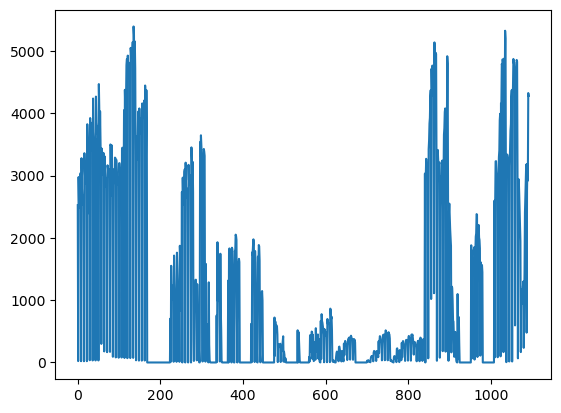

In [21]:
import matplotlib.pyplot as plt
plt.plot(preds)
plt.show()

In [19]:
submission.to_csv(os.path.join(sub_path,"baseline_submission23.csv"), index=False)

In [20]:
#11.07 12:04:06 ~ 11.08